# Seaborn worksheet exercises 1

Below are some sample exercises taken from DataCamp's Data Science in Python course, module 14 - Data Visualisation in Python.  Here we focus on simple linear regression models.

## Simple linear regressions

As you have seen, seaborn provides a convenient interface to generate complex and great-looking statistical plots. One of the simplest things you can do using seaborn is to fit and visualize a simple linear regression between two variables using `sns.lmplot()`.

One difference between seaborn and regular matplotlib plotting is that you can pass pandas DataFrames directly to the plot and refer to each column by name. For example, if you were to plot the column `'price'` vs the column `'area'` from a DataFrame `df`, you could call `sns.lmplot(x='area', y='price', data=df)`.

In this exercise, you will once again use the DataFrame `auto` containing the auto-mpg dataset. You will plot a linear regression illustrating the relationship between automobile weight and horse power.

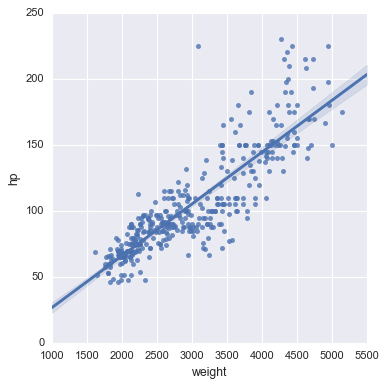

In [5]:
# Import plotting modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

file_name = 'https://raw.githubusercontent.com/JasonKwo/DataCamp-Data-Scientist-with-Python/master/14-Introduction-to-data-visualisation-with-Python/auto-mpg.csv'
auto = pd.read_csv(file_name)

# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x='weight', y='hp', data=auto)

# Display the plot
plt.show()

## Plotting residuals of a regression

Often, you don't just want to see the regression itself but also see the residuals to get a better idea how well the regression captured the data. Seaborn provides `sns.residplot()` for that purpose, visualizing how far datapoints diverge from the regression line.

In this exercise, you will visualize the residuals of a regression between the `'hp'` column (horse power) and the `'mpg'` column (miles per gallon) of the `auto` DataFrame used previously.

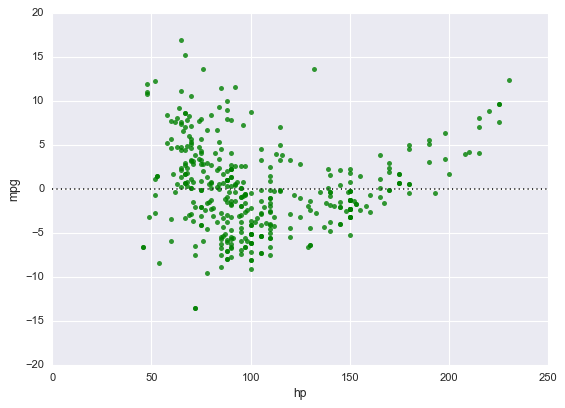

In [6]:
# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x='hp',y='mpg',data=auto,color='green')

# Display the plot
plt.show()

## Higher-order regressions

When there are more complex relationships between two variables, a simple first order regression is often not sufficient to accurately capture the relationship between the variables. Seaborn makes it simple to compute and visualize regressions of varying orders.

Here, you will plot a second order regression between the horse power ('hp') and miles per gallon ('mpg') using `sns.regplot()` (the function `sns.lmplot()` is a higher-level interface to `sns.regplot()`). However, before plotting this relationship, compare how the residual changes depending on the order of the regression. Does a second order regression perform significantly better than a simple linear regression?

A principal difference between `sns.lmplot()` and `sns.regplot()` is the way in which matplotlib options are passed (sns.regplot() is more permissive).

- For both `sns.lmplot()` and `sns.regplot()`, the keyword `order` is used to control the order of polynomial regression.
- The function `sns.regplot()` uses the argument `scatter=None` to prevent plotting the scatter plot points again.

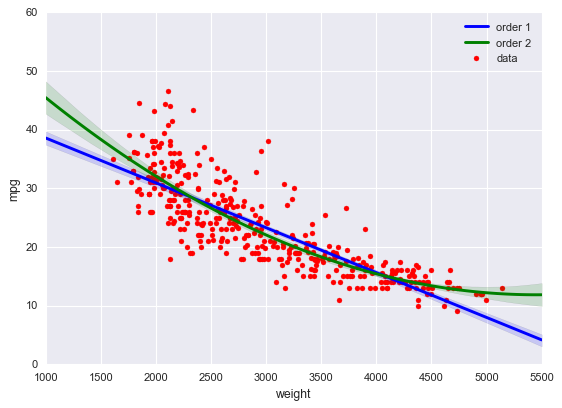

In [8]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto['mpg'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, color='blue', scatter=None, order=1, label='order 1')

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, color='green', scatter=None, order=2, label='order 2')

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

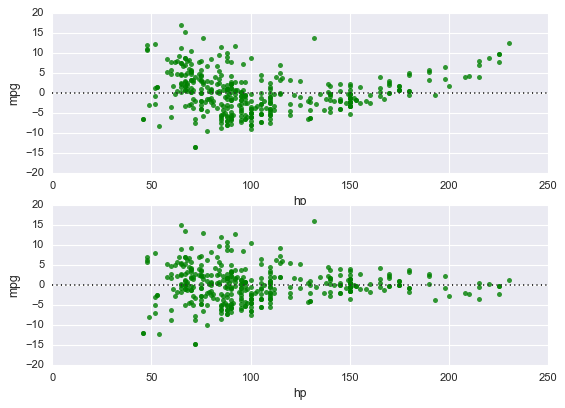

In [15]:
# Compare residual plots (not official exercise)

plt.subplot(2,1,1)
sns.residplot(x='hp',y='mpg',data=auto,color='green', order=1)

plt.subplot(2,1,2)
sns.residplot(x='hp',y='mpg',data=auto,color='green', order=2)

# Display the plot
plt.show()

## Grouping linear regressions by hue

Often it is useful to compare and contrast trends between different groups. Seaborn makes it possible to apply linear regressions separately for subsets of the data by applying a groupby operation. Using the `hue` argument, you can specify a categorical variable by which to group data observations. The distinct groups of points are used to produce distinct regressions with different hues in the plot.

In the automobile dataset you can view the relationship between weight (`'weight'`) and horsepower (`'hp'`) of the cars and group them by their origin (`'origin'`), giving you a quick visual indication how the relationship differs by continent.

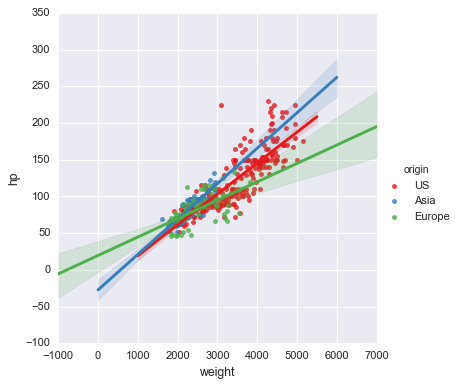

In [16]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x='weight',y='hp', data=auto, hue='origin', palette='Set1')

# Display the plot
plt.show()

## Grouping linear regressions by row or column

Rather than overlaying linear regressions of grouped data in the same plot, we may want to use a grid of subplots. The `sns.lmplot()` accepts the arguments `row` and/or `col` to arrangements of subplots for regressions.

You'll use the automobile dataset again and, this time, you'll use the keyword argument `row` to display the subplots organized in rows. That is, you'll produce horsepower vs. weight regressions grouped by continent of origin in separate subplots stacked vertically.

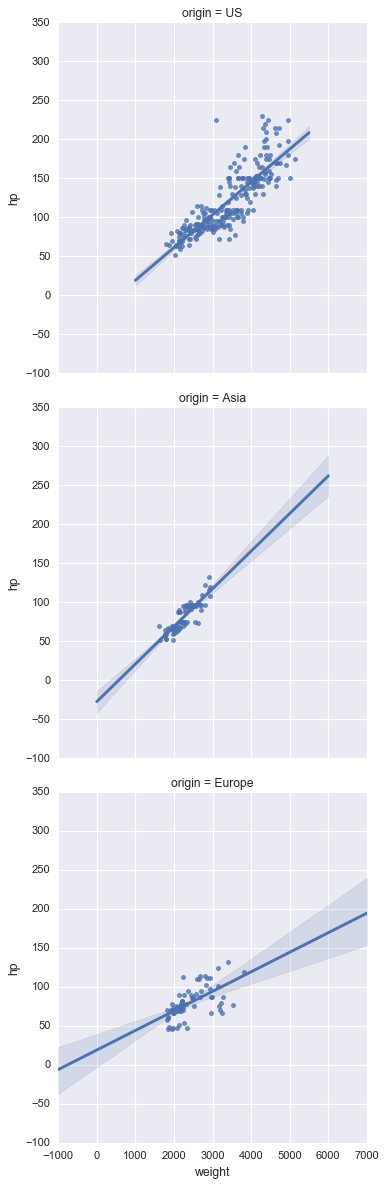

In [17]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x='weight', y='hp', data=auto, row='origin')

# Display the plot
plt.show()